# Real Estate Price Prediction Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To read the file
df1 =  pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#### Data Cleaning

In [3]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
#To extract the important column datas
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
#To check the NaN values

df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df3 = df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
#To create a new column for the room size

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [9]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
df3[df3['bhk'] > 20]   #found an error as the sqft and bedroom numbers are not matching

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [12]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [16]:
df4 = df3.copy()

In [17]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


#### Feature Engineering and Dimensionality Techniques

In [18]:
df5 = df4.copy()

In [19]:
df5['price_per_sqft'] = df5['price'] * 100000 /  df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
len(df5['location'].unique())

1304

In [21]:
df5['location'] = df5['location'].apply(lambda x: x.strip()) #Remove any spaces at the end of the location name

In [22]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [23]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [24]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [25]:
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [26]:
df5['location'] = df5['location'].apply(lambda x : 'Other' if x in location_stats_less_than_10 else x)

In [27]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


#### Outlier Removal

In [28]:
df6 = df5[~(df5['total_sqft'] / df5['bhk'] < 300)] 

In [29]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [30]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [31]:
def remove_pps_outliers(df):
    
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (m - st)) & (subdf['price_per_sqft'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [32]:
def plot_scatter_chart(df, location):
    
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker = '+', color = 'red', label = '3 BHK', s = 50)
     
    plt.xlabel('Total Sqft Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
    plt.show()

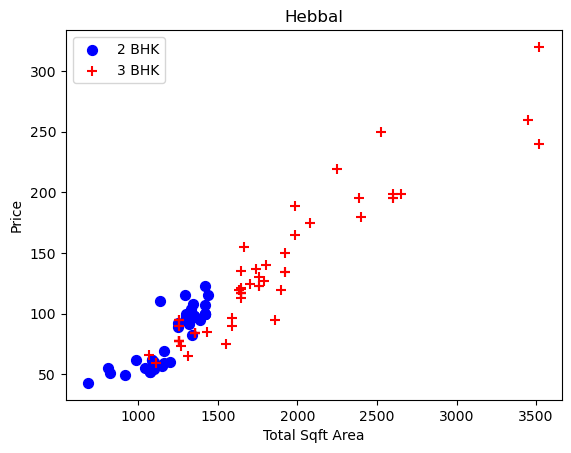

In [33]:
plot_scatter_chart(df7, 'Hebbal')

#### To remove thos 2 BHK apartments whose price per sqft is less than mean price per sqft of 1 BHK apartments

In [34]:
def remove_bhk_outliers(df):
    
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                              'mean' : np.mean(bhk_df['price_per_sqft']),
                              'std' : np.std(bhk_df['price_per_sqft']),
                              'count' : bhk_df.shape[0]
                               }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outliers(df7)
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10230,Yeshwanthpur,2 BHK,1195.0,2.0,100.0,2,8368.200837
10231,Yeshwanthpur,3 BHK,1692.0,3.0,108.0,3,6382.978723
10233,Yeshwanthpur,6 Bedroom,2500.0,5.0,185.0,6,7400.000000
10238,Yeshwanthpur,3 BHK,1855.0,3.0,135.0,3,7277.628032


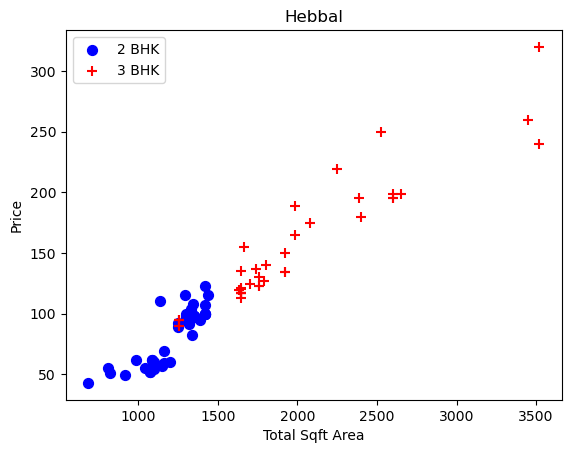

In [35]:
plot_scatter_chart(df8, 'Hebbal')

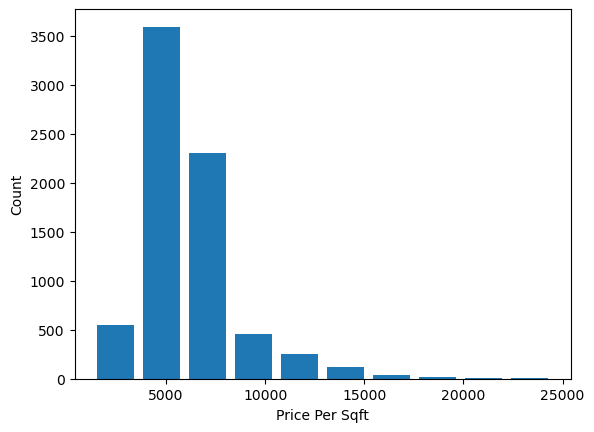

In [36]:
#To plot the histogram for the price per sqft

plt.hist(df8['price_per_sqft'], rwidth = 0.8)
plt.xlabel('Price Per Sqft')
plt.ylabel('Count')
plt.show()

In [37]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [38]:
df8[df8['bath'] > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5925,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
6014,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6747,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
7078,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


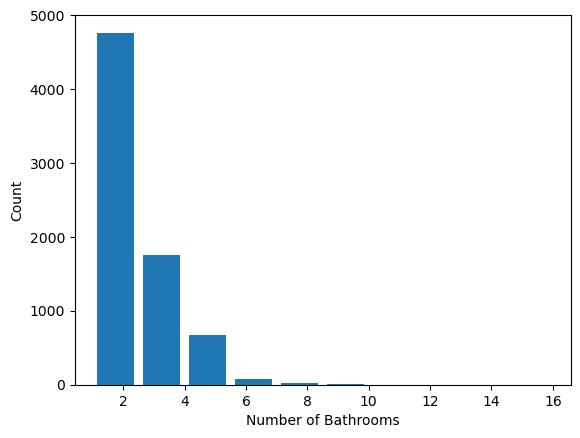

In [39]:
plt.hist(df8['bath'], rwidth = 0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

In [40]:
df9  = df8[df8['bath'] < df8['bhk'] + 2]  #Condition
df9.shape

(7251, 7)

In [41]:
#To make the data with only the required columns
df10 = df9.drop(['size', 'price_per_sqft'], axis = 1)


In [42]:
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10230,Yeshwanthpur,1195.0,2.0,100.0,2
10231,Yeshwanthpur,1692.0,3.0,108.0,3
10233,Yeshwanthpur,2500.0,5.0,185.0,6
10238,Yeshwanthpur,1855.0,3.0,135.0,3


#### To build the model

In [43]:
dummies = pd.get_dummies(df10['location'])

In [44]:
df11 = pd.concat([df10, dummies], axis =1)

In [45]:
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,Yeshwanthpur,1195.0,2.0,100.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10231,Yeshwanthpur,1692.0,3.0,108.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10233,Yeshwanthpur,2500.0,5.0,185.0,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10238,Yeshwanthpur,1855.0,3.0,135.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [46]:
df12 = df11.drop(['location'], axis = 1)

In [47]:
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,1195.0,2.0,100.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10231,1692.0,3.0,108.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10233,2500.0,5.0,185.0,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10238,1855.0,3.0,135.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [48]:
x = df12.drop(['price'], axis =1)

In [49]:
y = df12['price']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()

model.fit(x_train, y_train)
model.predict(x_test)
model.score(x_test, y_test)

0.869191445217459

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), x, y, cv = cv)

array([0.85424418, 0.84187647, 0.84728412, 0.85171804, 0.87167671])

#### Hyper Parameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

def find_best_model_gridsearchgcv(x, y):
    
    algos = {
             'linear_regreesion': {
                                   'model' : LinearRegression(),
                                   'params': {'fit_intercept': [True, False],
                                              'copy_X': [True, False]}
                                   },
             'lasso' : {
                        'model' : Lasso(),
                        'params': {'alpha' : [1,2],
                                   'selection': ['random', 'cyclic']}
                        },
             'decisio_tree' : {
                              'model' : DecisionTreeRegressor(),
                              'params':{'criterion' : ['mse', 'friedman_mse'],
                                        'splitter' : ['best', 'random']}
                               }
            }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
                       'model' : algo_name,
                       'best_score' : gs.best_score_,
                       'best_params' : gs.best_params_
                      })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [56]:
find_best_model_gridsearchgcv(x, y)

,model,best_score,best_params
0,linear_regreesion,0.853373,"{'copy_X': True, 'fit_intercept': False}"
1,lasso,0.740145,"{'alpha': 1, 'selection': 'cyclic'}"
2,decisio_tree,0.742145,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [57]:
#To predict the price
x = df12.drop(['price'], axis =1)
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]
    
    x1 = np.zeros(len(x.columns))
    x1[0] = sqft
    x1[1] = bath
    x1[2] = bhk
    
    if loc_index >= 0:
        x1[loc_index] =  1
        
    return model.predict([x1])[0]

In [58]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

82.81981031475848

In [59]:
predict_price('Indira Nagar', 1000, 2, 2)

179.37066882807807

In [60]:
#To save it as pickle file

import pickle
with open('bangalore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [61]:
# To save it as a json file

import json

columns = {
           'data_columns' : [col.lower() for col in x.columns]
           }
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))